I am using cyber coder dataset first, because it is small and the code can later be easily applied to other large dataset.
I am analyzing job description, and I did 5 parts each of them is not related except that share the same dataset, I just push it to github so that you guys know what I am working on and we won't overlap job. And we can learn from each other and discuss how to improve the code and what to do next. Because I kind of got stuck in what to do after generate the tfidfmatrix(Part4), so I didn't continue after part 4, I will ask Nick or professor on Thursday or if you guys have any ideas or advice, I will appreciate if you can tell me! 
And now I am dealing with the salary part, hopefully I can figure out some correlations with job description key words.
Thank you very much!!!!~~~ Happy coding!

In [530]:
#Part 1: Data preprocessing



import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import heapq

In [531]:
#generate wordlist and lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
alist = [line.rstrip() for line in open('stopwords.txt')]
stopword = stopwords.words('english') + alist

In [532]:
dataset = pd.read_csv('cybercoder.csv')

In [533]:
dataset.head()

Unnamed: 0       Job Title           Location      Job Salary  \
0           0  Data Scientist   Santa Monica, CA  ['100', '140']   
1           1  Data Scientist  New York City, NY  ['150', '250']   
2           2  Data Scientist       San Jose, CA              []   
3           3  Data Scientist       San Jose, CA              []   
4           4  Data Scientist  New York City, NY  ['120', '175']   

                                     Job Description  \
0  We are a stealth automotive financial technolo...   
1  If you are a Data Scientist with an interest i...   
2  San Jose, CA, US- RELOCATION INCLUDED! **Your ...   
3  San Jose, CA, US- RELOCATION INCLUDED! **Your ...   
4  If you are a Data Scientist with SQL and Model...   

                                    Preferred Skills  
0                  Preferred Skills              ...  
1                  Preferred Skills              ...  
2                  Preferred Skills              ...  
3                  Preferred Skills              ...  
4                  Preferred Skills              ...

corpus = dataset['Job Description'].tolist()

In [534]:
#preprocessing function
def my_preprocessing(s):
    s = s.lower() # downcase
    s = re.sub(r"\W"," ",s)
    s = re.sub(r"\d"," ",s) 
    s = re.sub(r"\s+[a-z]\s+"," ",s)
    s = re.sub(r"^[a-zA-Z\s*]*what you will be doing",'',s)
    s = re.sub(r"\s+",' ',s)
    return s

In [535]:
responsibilities=[]
benefits=[]
jddataset = dataset['Job Description']
for i in range(len(jddataset)):
    s = my_preprocessing(jddataset[i])
    if 'what in it for you' in s :
        responsibility = s.split('what in it for you')[0]
        benefit = s.split('what in it for you')[1]
    else:
        responsibility = s
        benefit = ''
    responsibilities.append(responsibility)
    benefits.append(benefit)

In [536]:
def my_tokenize(s):
    tokens = nltk.tokenize.word_tokenize(s) # split string into words (tokens)
    tokens = [t for t in tokens if len(t) > 2] # remove short words, they're probably not useful
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens] # put words into base form
    tokens = [t for t in tokens if t not in set(stopword)]# remove stopwords
    s = ' '.join(tokens)
    return s

In [537]:
#tokenize responsibilities
for i in range(len(responsibilities)):
    responsibilities[i] = my_tokenize(responsibilities[i])
    i = i+1

In [440]:
#Part 2: begin topic modeling using LDA




text = pd.DataFrame(responsibilities,columns = ['re'])
text['re']

0      play pivotal role transforming auto industry d...
1      data science team highly respected hedge fund ...
2      san jose relocation included application consi...
3      san jose relocation included application consi...
4      build predictive behavioral analysis model mar...
5      test iterate improve risk engine fraud modelsw...
6      extracting analyzing data creating report sear...
7      analyze model structured data implement algori...
8      ideal candidate expertise data set explore int...
9      ideal candidate expertise data set explore int...
10     develop lead quantitative research program dat...
11     implement advanced statistical method predicti...
12     based redmond fast growing technology company ...
13     provide daily support user resolving computer ...
14     cornerstone company data science capability pr...
15     data scientist engineer responsible following ...
16     data scientist agency experience read headquar...
17     data scientist experienc

In [495]:
stopwords = ['experience', 'data']
for i in range(len(text_list)):
    for word in list(text_list[i]):  # iterating on a copy since removing will mess things up
        if word in stopwords:
            text_list[i].remove(word)

In [493]:
text_list = [i.split() for i in text['re']]
len(text_list)

525

In [496]:
# Importing Gensim
import gensim
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index.
dictionary = corpora.Dictionary(text_list)
dictionary.save('dictionary.dict')
print (dictionary)

Dictionary(4213 unique tokens: ['ability', 'acquisition', 'advanced', 'algorithm', 'app']...)


In [497]:
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]
corpora.MmCorpus.serialize('corpus.mm', doc_term_matrix)

print (len(doc_term_matrix))
print (doc_term_matrix[100])

525
[(9, 1), (10, 1), (20, 1), (22, 2), (31, 1), (48, 1), (63, 1), (67, 1), (72, 1), (79, 1), (84, 1), (86, 2), (95, 1), (141, 1), (160, 1), (165, 1), (241, 3), (245, 3), (259, 1), (265, 1), (274, 1), (286, 1), (325, 1), (329, 1), (361, 1), (364, 1), (369, 1), (374, 1), (377, 1), (403, 1), (416, 2), (420, 1), (433, 1), (506, 1), (511, 1), (518, 1), (539, 1), (550, 1), (605, 2), (623, 1), (766, 1), (809, 1), (918, 1), (1123, 1), (1164, 1), (1217, 1), (1318, 1), (1333, 1), (1536, 1), (1656, 1), (1729, 1), (1730, 1), (1731, 1), (1732, 1), (1733, 1), (1734, 1), (1735, 1), (1736, 1), (1737, 1), (1738, 1), (1739, 1)]


In [498]:
from time import time
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO,
                   filename='running.log',filemode='w')

In [499]:
start = time()
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=10, id2word = dictionary, passes=50)
print ('used: {:.2f}s'.format(time()-start))

used: 33.08s


In [500]:
for i in ldamodel.print_topics(): 
    for j in i: print (j)

0
0.020*"software" + 0.018*"system" + 0.017*"design" + 0.015*"team" + 0.015*"development" + 0.012*"application" + 0.011*"product" + 0.011*"test" + 0.011*"testing" + 0.010*"cloud"
1
0.017*"learning" + 0.015*"machine" + 0.014*"team" + 0.011*"please" + 0.010*"product" + 0.009*"scientist" + 0.009*"model" + 0.009*"company" + 0.008*"industry" + 0.007*"strong"
2
0.016*"system" + 0.015*"design" + 0.014*"analysis" + 0.012*"knowledge" + 0.012*"tool" + 0.011*"sql" + 0.011*"development" + 0.011*"business" + 0.009*"database" + 0.008*"reporting"
3
0.020*"system" + 0.018*"security" + 0.010*"network" + 0.009*"process" + 0.008*"project" + 0.007*"knowledge" + 0.006*"maintenance" + 0.006*"automation" + 0.006*"business" + 0.006*"management"
4
0.016*"sql" + 0.013*"python" + 0.011*"model" + 0.010*"knowledge" + 0.009*"building" + 0.008*"database" + 0.008*"please" + 0.008*"using" + 0.008*"statistical" + 0.007*"user"
5
0.033*"learning" + 0.032*"machine" + 0.012*"python" + 0.010*"team" + 0.009*"language" + 0.00

In [501]:
ldamodel.save('topic.model')

In [502]:
import pyLDAvis.gensim
import gensim
pyLDAvis.enable_notebook()

In [503]:
d = gensim.corpora.Dictionary.load('dictionary.dict')
c = gensim.corpora.MmCorpus('corpus.mm')
lda = gensim.models.LdaModel.load('topic.model')

In [504]:
data = pyLDAvis.gensim.prepare(lda, c, d)
data

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
0      18.193596        1       1  0.101461  0.039881
2      13.576078        1       2  0.119474 -0.040790
6      13.032121        1       3  0.057274  0.033675
1      11.760841        1       4 -0.092592 -0.085572
7      10.752704        1       5  0.012584 -0.128782
5      10.092809        1       6 -0.177962 -0.059330
3       9.108283        1       7  0.146811  0.073223
8       5.542677        1       8  0.046425  0.082930
9       4.226805        1       9 -0.206055  0.160766
4       3.714093        1      10 -0.007418 -0.075999, topic_info=     Category        Freq          Term       Total  loglift  logprob
term                                                                 
48    Default  324.000000      learning  324.000000  30.0000  30.0000
50    Default  294.000000       machine  294.000000  29.0000  29.0000
454   Default  228.000000       project  228.000000  28.0000  28.0000
84    Default  198.000000           sql  198.000000  27.0000  27.0000
1570  Default  149.000000      security  149.000000  26.0000  26.0000
65    Default  278.000000        python  278.000000  25.0000  25.0000
198   Default  223.000000          java  223.000000  24.0000  24.0000
52    Default  120.000000         model  120.000000  23.0000  23.0000
144   Default  143.000000   programming  143.000000  22.0000  22.0000
73    Default  281.000000       science  281.000000  21.0000  21.0000
3     Default  156.000000     algorithm  156.000000  20.0000  20.0000
122   Default   68.000000     financial   68.000000  19.0000  19.0000
284   Default  166.000000    management  166.000000  18.0000  18.0000
314   Default  452.000000        system  452.000000  17.0000  17.0000
67    Default   66.000000  quantitative   66.000000  16.0000  16.0000
205   Default   51.000000           nlp   51.000000  15.0000  15.0000
364   Default  166.000000      database  166.000000  14.0000  14.0000
466   Default   38.000000       trading   38.000000  13.0000  13.0000
22    Default  363.000000        design  363.000000  12.0000  12.0000
131   Default  118.000000      language  118.000000  11.0000  11.0000
310   Default   86.000000   statistical   86.000000  10.0000  10.0000
140   Default  205.000000        please  205.000000   9.0000   9.0000
371   Default  327.000000      software  327.000000   8.0000   8.0000
1249  Default   97.000000           web   97.000000   7.0000   7.0000
245   Default  219.000000      analysis  219.000000   6.0000   6.0000
121   Default   88.000000         field   88.000000   5.0000   5.0000
62    Default  128.000000       process  128.000000   4.0000   4.0000
402   Default  225.000000          tool  225.000000   3.0000   3.0000
2801  Default   31.000000         cisco   31.000000   2.0000   2.0000
74    Default  115.000000     scientist  115.000000   1.0000   1.0000
...       ...         ...           ...         ...      ...      ...
108   Topic10   15.267509      building  142.166534   1.0618  -4.7010
65    Topic10   21.486610        python  278.586487   0.7307  -4.3593
241   Topic10   11.757133          user   94.183434   1.2123  -4.9623
361   Topic10    9.787510       analyst   67.270920   1.3654  -5.1456
1364  Topic10    4.925825     dashboard   18.781071   1.9547  -5.8323
289   Topic10   11.683991      modeling   98.587456   1.1603  -4.9685
42    Topic10    5.619661          idea   25.792467   1.7692  -5.7005
2213  Topic10    3.274119       raleigh    9.047667   2.2766  -6.2407
189   Topic10    7.016194        growth   42.050278   1.5024  -5.4785
364   Topic10   13.720407      database  166.124832   0.7992  -4.8079
305   Topic10    6.447079          sale   36.863537   1.5494  -5.5631
62    Topic10   11.754488       process  128.255661   0.9032  -4.9625
325   Topic10   12.952497         using  156.704163   0.8000  -4.8655
293   Topic10   10.703804   performance  125.925858   0.8279  -5.0561
5     Topic10   11.

In [505]:
pyLDAvis.save_html(data,'vis.html')

In [506]:
%%time
import gensim
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
lda = gensim.models.LdaModel.load('topic.model')

Wall time: 11 ms


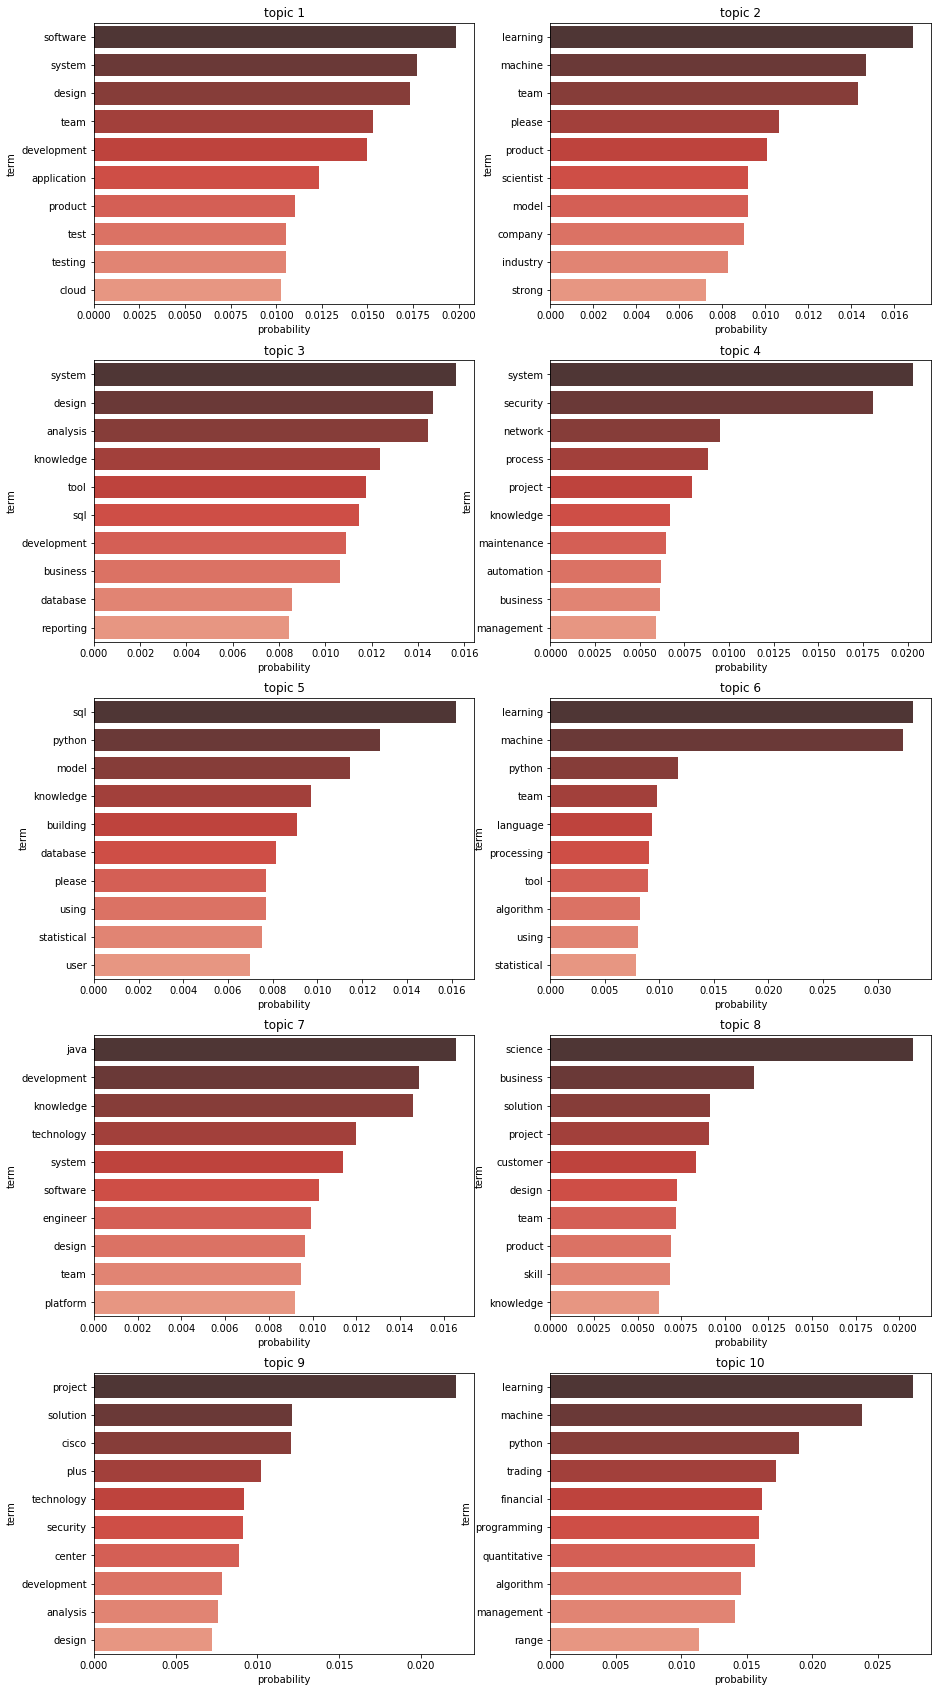

In [507]:
fiz=plt.figure(figsize=(15,30))
for i in range(10):
    df=pd.DataFrame(lda.show_topic(i), columns=['term','prob']).set_index('term')
    plt.subplot(5,2,i+1)
    plt.title('topic '+str(i+1))
    sns.barplot(x='prob', y=df.index, data=df, label='Cities', palette='Reds_d')
    plt.xlabel('probability')
    

plt.show()

In [489]:
#Part 3: word frequency




word2count = {}
for data in responsibilities:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1

In [490]:
word2count.pop('data')
word2count.pop('experience')

1571

In [363]:
#sort words 
from collections import OrderedDict
sorted_word = OrderedDict(sorted(word2count.items(), 
                                  key=lambda kv: kv[1], reverse=True))
sorted_word

OrderedDict([('system', 485),
             ('team', 477),
             ('knowledge', 393),
             ('design', 388),
             ('development', 384),
             ('learning', 360),
             ('software', 350),
             ('machine', 326),
             ('python', 309),
             ('product', 308),
             ('science', 306),
             ('technology', 261),
             ('project', 251),
             ('business', 245),
             ('solution', 242),
             ('tool', 241),
             ('analysis', 239),
             ('engineer', 238),
             ('java', 238),
             ('please', 227),
             ('strong', 226),
             ('skill', 226),
             ('engineering', 220),
             ('application', 218),
             ('develop', 217),
             ('position', 217),
             ('sql', 216),
             ('environment', 201),
             ('platform', 196),
             ('computer', 193),
             ('service', 189),
             ('cloud', 188),


In [424]:
#choose most frequent ones
freq_words = heapq.nlargest(1000,word2count,key = word2count.get)
freq_words

['data',
 'experience',
 'system',
 'team',
 'knowledge',
 'design',
 'development',
 'learning',
 'software',
 'machine',
 'python',
 'product',
 'science',
 'technology',
 'project',
 'business',
 'solution',
 'tool',
 'analysis',
 'engineer',
 'java',
 'please',
 'strong',
 'skill',
 'engineering',
 'application',
 'develop',
 'position',
 'sql',
 'environment',
 'platform',
 'computer',
 'service',
 'cloud',
 'management',
 'degree',
 'database',
 'algorithm',
 'apply',
 'using',
 'testing',
 'based',
 'security',
 'programming',
 'etc',
 'building',
 'company',
 'related',
 'developing',
 'applicant',
 'plus',
 'authorized',
 'support',
 'process',
 'test',
 'understanding',
 'build',
 'performance',
 'code',
 'model',
 'language',
 'technical',
 'aws',
 'customer',
 'developer',
 'scientist',
 'senior',
 'architecture',
 'quality',
 'analytics',
 'spark',
 'server',
 'hadoop',
 'industry',
 'client',
 'provide',
 'time',
 'modeling',
 'including',
 'processing',
 'create',
 'user

In [508]:
import plotly.offline as pyo
from plotly.graph_objs import * 
import plotly.plotly as py
import pandas as pd
from pandas import DataFrame

pyo.offline.init_notebook_mode()

frequency = {'type' : 'bar',
                       'orientation' : 'h',
                     'y' : key,
                     'x' : value,
                     'marker' : {'color' : 'purple',
                            },
                     'opacity' : 0.5}

layout = {'title' : "Word Frequency",
         'xaxis' : {'title' : 'Count'},
         'yaxis' : {'title' : 'Words'}}
fig = {'data' : [frequency],
      'layout' : layout}
pyo.iplot(fig)

In [564]:
# Part 4: tfidf models build matrix
###################!!!!!!!!!!!!!!maximun feature = ????



from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range = (1,1), min_df=2, max_df= 0.8,smooth_idf=True)

X = vectorizer.fit_transform(responsibilities).toarray()
vectorizer.get_feature_names()


['ability',
 'able',
 'academia',
 'academic',
 'accelerate',
 'acceptance',
 'accepted',
 'accepting',
 'access',
 'accessibility',
 'accessing',
 'accessso',
 'accesswhat',
 'accomplish',
 'accomplishing',
 'accomplishment',
 'accordance',
 'account',
 'accountable',
 'accuracy',
 'accurate',
 'accurately',
 'achieve',
 'acquire',
 'acquiring',
 'acquisition',
 'act',
 'acting',
 'action',
 'actionable',
 'active',
 'actively',
 'activitieswhat',
 'activity',
 'actual',
 'actually',
 'acumen',
 'adapt',
 'adaptable',
 'adapting',
 'add',
 'added',
 'adding',
 'addition',
 'additional',
 'address',
 'addressed',
 'adherence',
 'adjacent',
 'administer',
 'administering',
 'administrating',
 'administration',
 'admission',
 'adobe',
 'adoption',
 'adtech',
 'advance',
 'advanced',
 'advancement',
 'advantage',
 'advantageous',
 'adversarial',
 'advertising',
 'advice',
 'advising',
 'advocate',
 'aerospike',
 'affect',
 'affecting',
 'agency',
 'agent',
 'aggregation',
 'aggressive',
 

In [565]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
X = transformer.fit_transform(X).toarray()
X = pd.DataFrame(X)
X

0         1     2         3     4     5     6     7         8     \
0    0.075833  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0  0.000000   
1    0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0  0.000000   
2    0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0  0.000000   
3    0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0  0.000000   
4    0.062959  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0  0.000000   
5    0.062060  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0  0.000000   
6    0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0  0.000000   
7    0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0  0.000000   
8    0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0  0.000000   
9    0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0  0.000000   
10   0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0  0.000000   
11   0.033868  0.000000   0.0  0.143249   0.0   0.0   0.0   0.0  0.000000   
12   0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0  0.000000   
13   0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0  0.000000   
14   0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0  0.000000   
15   0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0  0.000000   
16   0.041339  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0  0.000000   
17   0.051656  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0  0.000000   
18   0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0  0.000000   
19   0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0  0.000000   
20   0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0  0.000000   
21   0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0  0.000000   
22   0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0  0.000000   
23   0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0  0.000000   
24   0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0  0.000000   
25   0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0  0.000000   
26   0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0  0.000000   
27   0.030504  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0  0.000000   
28   0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0  0.000000   
29   0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0  0.000000   
..        ...       ...   ...       ...   ...   ...   ...   ...       ...   
495  0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0  0.000000   
496  0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0  0.000000   
497  0.076136  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0  0.000000   
498  0.000000  0.095448   0.0  0.000000   0.0   0.0   0.0   0.0  0.000000   
499  0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0  0.000000   
500  0.041289  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0  0.000000   
501  0.041289  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0  0.000000   
502  0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0  0.000000   
503  0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0  0.044635   
504  0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0  0.000000   
505  0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0  0.000000   
506  0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0  0.000000   
507  0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0  0.000000   
508  0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0  0.000000   
509  0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0  0.127195   
510  0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0  0.127195   
511  0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0  0.000000   
512  0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0  0.000000   
513  0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0  0.000000   
514  0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0  0.000000   
515  

In [566]:
newsalary = []
salary = dataset['Job Salary']
for i in range(len(salary)):
    s = salary[i][1:-1]
    s = re.findall('\d+', s )
    s = list(map(int, s))
    newsalary.append(np.mean(s))
    i +=1

In [570]:
from sklearn.preprocessing import StandardScaler
newsalary = pd.Series(newsalary)
scaler = StandardScaler()

In [567]:
X['y'] = newsalary.values
X

0         1    2         3    4    5    6    7         8    9  \
0    0.075833  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0   
1    0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0   
2    0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0   
3    0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0   
4    0.062959  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0   
5    0.062060  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0   
6    0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0   
7    0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0   
8    0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0   
9    0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0   
10   0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0   
11   0.033868  0.000000  0.0  0.143249  0.0  0.0  0.0  0.0  0.000000  0.0   
12   0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0   
13   0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0   
14   0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0   
15   0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0   
16   0.041339  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0   
17   0.051656  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0   
18   0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0   
19   0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0   
20   0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0   
21   0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0   
22   0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0   
23   0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0   
24   0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0   
25   0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0   
26   0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0   
27   0.030504  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0   
28   0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0   
29   0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0   
..        ...       ...  ...       ...  ...  ...  ...  ...       ...  ...   
495  0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0   
496  0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0   
497  0.076136  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0   
498  0.000000  0.095448  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0   
499  0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0   
500  0.041289  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0   
501  0.041289  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0   
502  0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0   
503  0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.044635  0.0   
504  0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0   
505  0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0   
506  0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0   
507  0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0   
508  0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0   
509  0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.127195  0.0   
510  0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.127195  0.0   
511  0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0   
512  0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0   
513  0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0   
514  0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0   
515  0.0

In [589]:
X = X.dropna()
X

0         1    2    3    4    5    6    7         8    9  ...    \
0    0.075833  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...     
1    0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...     
4    0.062959  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...     
5    0.062060  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...     
8    0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...     
9    0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...     
10   0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...     
15   0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...     
16   0.041339  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...     
20   0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...     
23   0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...     
24   0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...     
25   0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...     
26   0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...     
27   0.030504  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...     
28   0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...     
29   0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...     
30   0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...     
31   0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...     
32   0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...     
34   0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...     
36   0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...     
37   0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...     
40   0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...     
44   0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...     
45   0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...     
46   0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...     
47   0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...     
48   0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...     
49   0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...     
..        ...       ...  ...  ...  ...  ...  ...  ...       ...  ...  ...     
472  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.198136  0.0  ...     
473  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.129324  0.0  ...     
476  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...     
482  0.062325  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...     
483  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...     
484  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...     
487  0.055022  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...     
489  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...     
493  0.049642  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...     
495  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...     
496  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...     
497  0.076136  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...     
498  0.000000  0.095448  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...     
500  0.041289  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...     
501  0.041289  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...     
502  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...     
503  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.044635  0.0  ...     
504  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...     
505  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.00000

In [588]:
xdata = X.iloc[:,:-1].values
y = X.iloc[:,-1].values
y.shape

(343,)

In [583]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xdata, y, test_size = 0.2, random_state = 0)

ValueError: x and y must be the same size

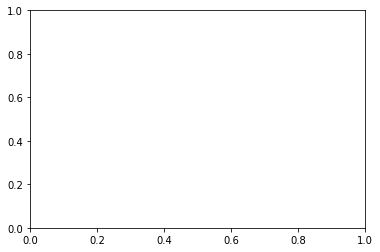

In [584]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [ ]:
# testdataset = dataset['Preferred Skills'][0]
# testdataset = re.sub('\s+',' ',testdataset)
# testdataset = testdataset.split()
# testdataset[2:]

In [301]:
#Part 5: generate wordcloud



import sys
from os import path
import numpy as np
from PIL import Image
import wikipedia
from wordcloud import WordCloud, STOPWORDS

In [302]:
currdir = path.dirname("C:/Users/Hanying Li/Desktop/home")

In [307]:
def create_wordcloud(MyData):
    mask = np.array(Image.open(path.join(currdir, "cloud.png")))
    wc = WordCloud(background_color="white",max_words=200, mask=mask,)
    wc.generate_from_frequencies(MyData)
    wc.to_file(path.join(currdir, "wc.png"))


In [308]:
create_wordcloud(word2count)